<a href="https://colab.research.google.com/github/Ahmed-Eldably/AI-Machine-Learning-Assesment/blob/master/time_series_analysis_lu_spring_2022_session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis and Forecasting LU at CODE

## Session 1 Time Series EDA, March 31st, 2022:




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

DATA_URL = "https://gist.githubusercontent.com/marcus-voss/b5fcbc82adff8f227fe8e8ee126c5f87/raw/6ed81f863524140c70368390589e4eab2f8f796d/load_data.csv"

## Working with Time Data

For this tutorial, we use the aggregated signal of ten US households. Let's download and load the data.

In [ ]:
data = pd.read_csv(DATA_URL)

Pandas can handle datetime. So we can either use the `parse_dates` argument when reading the data:


In [ ]:
data = pd.read_csv(DATA_URL, parse_dates=[0], index_col=0)

Or we can use `pd.to_datetime()` to ensure it is datetime:

In [ ]:
data = pd.read_csv(DATA_URL)

 For many time series tasks it is useful to have regular interval time series data. Pandas provides many useful functions to aggregate data to a specific resolution (see [their overview here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)). For instance if you want to make the Load series a daily time series, you can aggregate the series using for instance mean (or max?):

If one series has a different resolution then the other, it may also be desireable to change the resolution to a finer resolutions:

## Visualize Time Data

Now let's look at our data

In [ ]:
data.load.plot()

In [ ]:
fig = px.line(data, x=data.index, y='load')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

Let's plot the target variable, the power load (kWh, in blue), together with a covariate, outside temperature (celsius, in orange).

In [ ]:
ax = data["2015-07-01":"2015-07-08"].load.plot(figsize=(12,3),label='load')
data["2015-07-01":"2015-07-08"].temperature.plot(ax=ax, color="C1",label='temperature')

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data.temperature, data.load)
ax.set_xlabel("Temperature (C°)")
ax.set_ylabel("Load (kW)")

In [ ]:
# histogram

We can see that the profile is considerably influenced by the AC load, hence by the outside temperature. Thus the outside temperature should be a good predictor but we still need to learn a model that we can translate the patterns and reduce the spread we see on this image, compared for example to just applying a constant multiplication factor. 

 👉 ***Relevance to time series problems:*** *Analyze and visualize the data, the different predictive features and their correlations to form some hypotheses that you can test with different model set-ups.*

## Messy Data

When working with the data in the challenge (or in fact any data science problem), you may encounter two other practical issues that we don't address in detail here, but you should be aware of: *missing data* and *outliers*.  

Unfortunately for you, there is no definite way to approach either of the two practical problems as they are very dependent on the specific dataset and data science problem. 

For missing data, it can be helpful to simply ignore such instances that are not complete. However, this may result in throwing away data that can be useful in the prediction task. So another way is to fill missing data, e.g. by using interpolation methods (e.g. linear interpolation for short periods) or using actual forecasting methods to fill gaps (see the [KNN imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer) for sklearn).

For outliers there are also different methods to detect outliers as it depends a lot on the specific dataset. For instance a sudden spike in a household load profile can be a measurement error, but can just as well be a large device. Even if outliers are identified, how should one process the data? Treat it as missing data? Should it be filled with new values?

The following figure gives and example of missing data (top) and outliers (bottom). 

| | 
|:--:|
|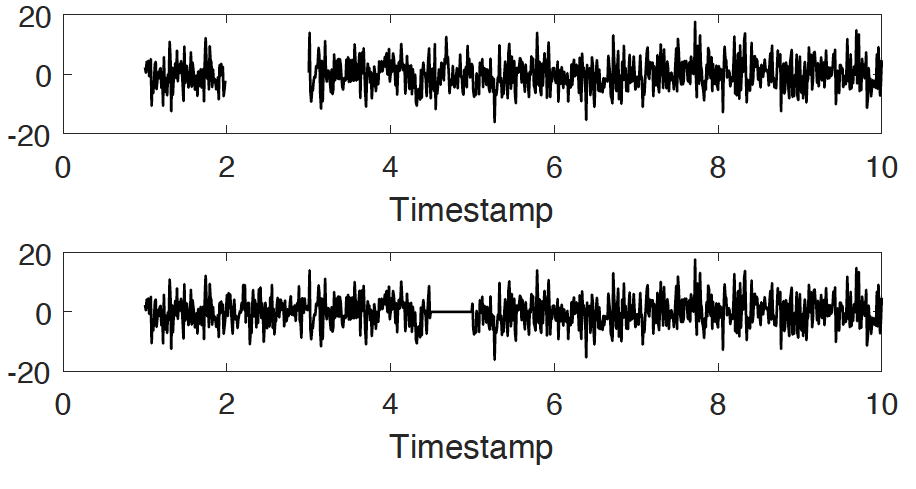 |
|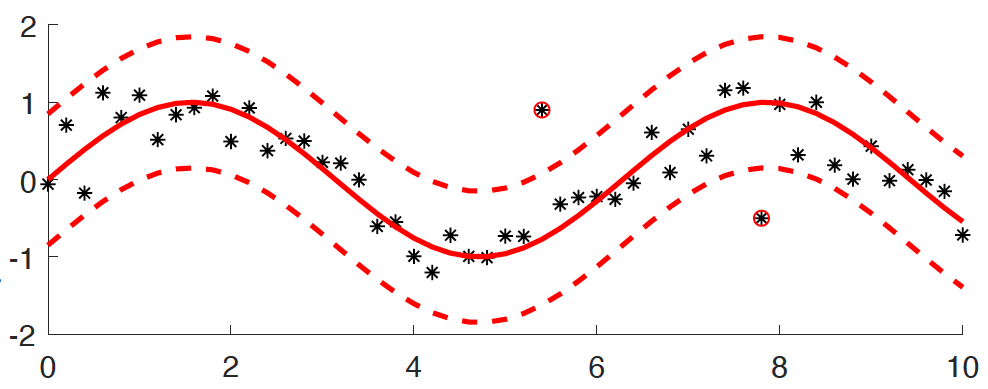|
| *Source: Own figure (by Stephen Haben).* |

 👉 ***Relevance to the LU:*** *As you are working with real-world data, you will have to watch out for missing and unrealistic values in the data and come up with solution strategies.*
